<div class='alert alert-info'>
    <h1 align="center">Tree Based Methods</h1>
    <h3 align="center">Mohammad Rahdar</h3>
</div>

# Intoroduction

Decision tree methods are a popular approach in machine learning for both classification and regression tasks. They are versatile, easy to understand, and can handle both numerical and categorical data. Here's how they work:

1. **Decision Nodes**: A decision tree starts with a root node that represents the entire dataset. At each internal node (including the root), the dataset is split into smaller subsets based on the value of one feature. This split is chosen to maximize the homogeneity of the target variable within each subset.

2. **Splitting Criteria**: The decision of which feature to split on and where to split is determined by a metric called impurity or purity. Common impurity measures include Gini impurity and entropy. The goal is to reduce impurity as much as possible with each split.

3. **Leaf Nodes**: The process of splitting continues recursively until a stopping criterion is met. This could be a maximum depth limit, a minimum number of samples required to split a node, or a minimum decrease in impurity gained from the split. Once a stopping criterion is reached, the final subsets are considered as leaf nodes.

4. **Prediction**: When a new instance needs to be classified or predicted, it traverses the decision tree from the root node down to a leaf node. At each node, it follows the decision rule based on the feature value until it reaches a leaf node. The prediction at the leaf node is then assigned to the instance.

Classification and regression tasks:
- For a regression tree
    - The predicted response for an observation is the mean response of the training observations that belong to the same terminal node.
- For a classification tree
    - The prediction of each observation class is the most commonly occurring class of training observations in the region to which it belongs.

Decision trees have several advantages:

- **Interpretability**: Decision trees are easy to interpret and visualize. You can easily understand the decision-making process by looking at the tree structure. Decision trees more closely mirror human decision making than do the regression and classification approaches.
  
- **Handling Non-Linearity**: They can model complex relationships between features and target variables, as they can capture non-linearities and interactions between features.

- **Mixed Data Types**: Decision trees can handle both numerical and categorical data without the need for pre-processing such as one-hot encoding.

However, they also have some limitations:

- **Overfitting**: Decision trees are prone to overfitting, especially when they grow too deep or are not pruned properly. Overfitting occurs when the tree captures noise in the training data instead of the underlying patterns.

- **Instability**: Small variations in the data can lead to different decision tree structures, making them unstable. Techniques like ensemble methods (e.g., Random Forests) can help mitigate this issue.


- **Bias towards Features with Many Levels**: Decision trees tend to favor features with a large number of levels (i.e., many possible values), which can lead to bias in the tree structure.

To mitigate these issues, techniques like pruning, setting maximum depth, or using ensemble methods like Random Forests or Gradient Boosted Trees are often employed. These methods help improve the generalization performance of decision trees on unseen data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
sns.set()

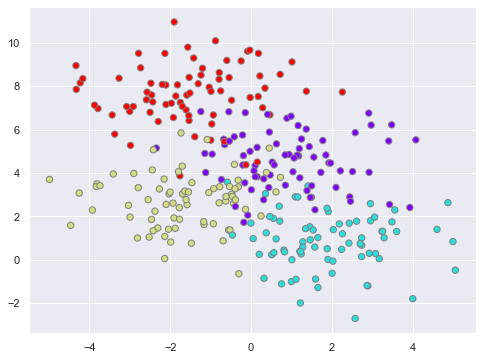

In [2]:
X, y = make_blobs(n_samples=300, centers=4,
                 cluster_std=1.3, random_state=0)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40,
            edgecolors='gray', cmap='rainbow');

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

The following code snippet demonstrates how to train a decision tree classifier `DecisionTreeClassifier` using scikit-learn in Python. 

In [4]:
clf = DecisionTreeClassifier() # initialize a decision tree classifier object
clf.fit(X_train, y_train);     # fit the decision tree classifier to the training data

The above classifier will use the `Gini` impurity measure to make decisions about how to split the data. You can change the input `criterion` to measure the quality of a split. It determines how the decision tree algorithm chooses the best split at each node. The default value is `'gini'`, but you can also select `'entropy'`.

**Gini Impurity:**

Gini impurity measures the degree of impurity or uncertainty in a set of data points. Gini impurity is a number between 0 and 0.5 that indicates the likelihood of new, random data being misclassified. A Gini impurity of 0 indicates a pure node, and 0.5 indicates a most impure node.

Mathematically, for a dataset $D$ with $K$ classes, the Gini impurity $I_G(D)$ is calculated as:

$$ I_G(D) = 1 - \sum_{i=1}^{K} (p_i)^2 $$

Where $p_i$ is the probability of an item being classified into class $i$.

- Gini impurity ranges from 0 to 0.5, where 0 indicates perfect purity (all items belong to the same class), and 0.5 indicates maximum impurity (items are evenly distributed among all classes).
- In decision trees, at each node, the algorithm selects the feature and split point that minimizes the weighted sum of the Gini impurity of the resulting child nodes.
- Gini impurity tends to bias towards larger partitions and frequently used with categorical variables.

**Entropy:**

Entropy is another measure of impurity or disorder in a dataset. It quantifies the uncertainty associated with a set of data points. In the context of decision trees, entropy measures the average amount of information (or unpredictability) required to classify a random sample from the dataset.

Mathematically, for a dataset $D$ with $K$ classes, the entropy $H(D)$ is calculated as:

$$ H(D) = - \sum_{i=1}^{K} p_i \log_2(p_i) $$

Where $p_i$ is the probability of an item being classified into class $i$.

- Entropy ranges from 0 to $\log_2(K)$, where 0 indicates perfect purity (all items belong to the same class), and $\log_2(K)$ indicates maximum impurity (items are evenly distributed among all classes).
- In decision trees, at each node, the algorithm selects the feature and split point that minimizes the weighted sum of the entropy of the resulting child nodes.
- Entropy is more sensitive to the number of classes in the dataset compared to Gini impurity. It tends to create more balanced trees and is often preferred when dealing with continuous variables.

**Comparison:**

- Both Gini impurity and entropy are widely used as splitting criteria in decision trees.
- Empirical studies have shown that the choice between Gini impurity and entropy often does not significantly affect the performance of the resulting decision tree.
- Gini impurity tends to be slightly faster to compute since it doesn't involve logarithmic calculations.
- The decision of which measure to use may depend on the dataset characteristics, such as the number of classes, variable types (categorical or continuous), and computational efficiency requirements.
- In practice, it's common to experiment with both Gini impurity and entropy as splitting criteria and choose the one that yields better results based on cross-validation or other performance evaluation techniques.

In [5]:
# predict the target labels for the training dataset
y_train_pred = clf.predict(X_train)
print("Train Accuracy (decision tree):",
      metrics.accuracy_score(y_train, y_train_pred))

# predict the target labels for the testing dataset
y_test_pred = clf.predict(X_test)
print("Test Accuracy (decision tree):",
      metrics.accuracy_score(y_test, y_test_pred))

Train Accuracy (decision tree): 1.0
Test Accuracy (decision tree): 0.8111111111111111


As seen in the above results, the training score is perfect (1.00), while the testing score is lower (0.82). This indicates potential overfitting, where the model performs exceptionally well on the training data but generalizes poorly to unseen data.

In the following modified code snippet, the maximum depth of the decision tree classifier is limited to 3 to mitigate the risk of overfitting. A smaller tree with fewer splits might lead to lower variance and better interpretation at the cost of a little bias.

In [6]:
# limit maximum depth to avoid overfitting
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train);

In [7]:
y_train_pred = clf.predict(X_train)
print("Train Accuracy (decision tree):",
      metrics.accuracy_score(y_train, y_train_pred))

y_test_pred = clf.predict(X_test)
print("Test Accuracy (decision tree):",
      metrics.accuracy_score(y_test, y_test_pred))

Train Accuracy (decision tree): 0.8952380952380953
Test Accuracy (decision tree): 0.8555555555555555


By setting the `max_depth` parameter, we're controlling the complexity of the decision tree, which can help prevent overfitting. However, it's important to note that choosing the appropriate value for the `max_depth` parameter often requires experimentation and validation on a validation dataset or through techniques like cross-validation.

In [8]:
# define a function to visualize the decision boundary using contour plots
def PlotDB(model, X, y):
    """
    Inputs:
        model: The classification model to visualize.
        X: The feature matrix.
        y: The target labels.
    """
    
    plt.figure(figsize=(7,5))
    
    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40,
                edgecolors='gray', cmap='rainbow')
    plt.axis('tight')
    plt.axis('off')
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        
    # fit the estimator
    model.fit(X, y)
    U, V = np.meshgrid(np.arange(x_min, x_max, .1),
                       np.arange(y_min, y_max, .1))
    Z = model.predict(np.c_[U.ravel(), V.ravel()]).reshape(U.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    plt.contourf(U, V, Z, alpha=0.3, cmap='rainbow',
                 levels=np.arange(n_classes + 1) - 0.5)

Decision tree classifier


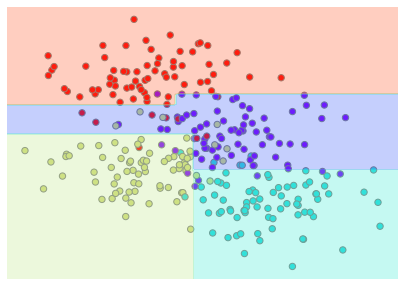

In [9]:
print('Decision tree classifier')
PlotDB(clf, X, y)
plt.show()

Let's visualize the decision tree structure using the `plot_tree` function from the `sklearn.tree` module. By visualizing the decision tree, you can gain a better understanding of how the model makes predictions and identify important features in the dataset. This can be useful for interpreting the model's behavior, explaining predictions to stakeholders, and identifying potential areas for model improvement.

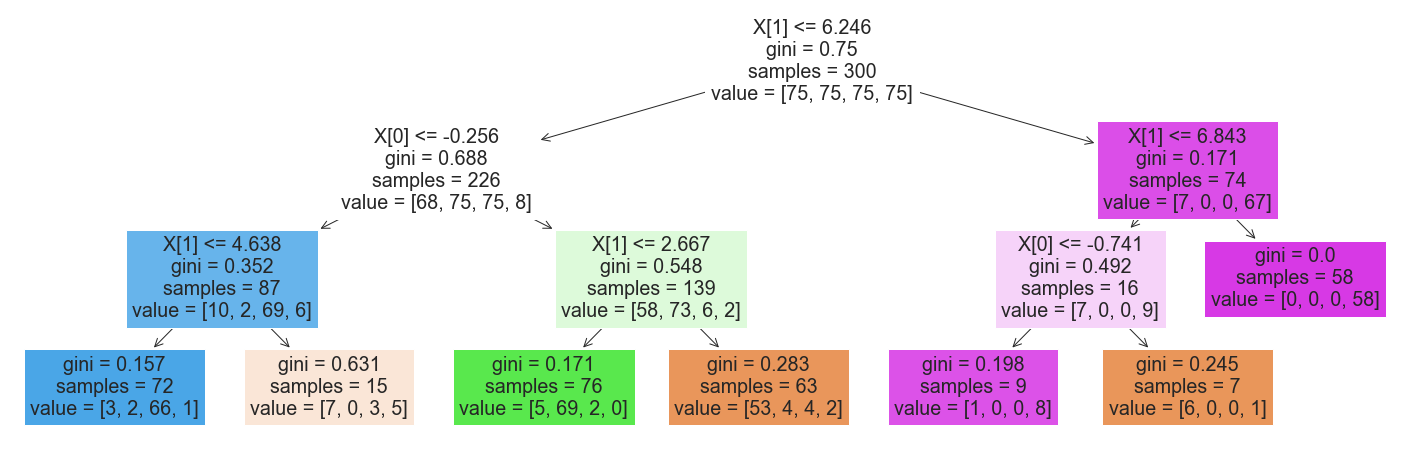

In [10]:
plt.figure(figsize=(25,8))
tree.plot_tree(clf, filled=True);

The above code visualizes the trained decision tree classifier (`clf`). Let's break down what the visualization represents:

1. **Nodes**: Each node in the tree represents a decision point based on a feature. The top node is the root node, and subsequent nodes are internal nodes. The leaf nodes are the terminal nodes that represent the final decision or prediction.

2. **Edges**: The edges between nodes represent the decision rules. Each edge corresponds to a possible outcome of the decision based on the feature's value. For example, if a feature's value is less than a certain threshold, one edge will lead to one child node, while another edge will lead to a different child node if the value is greater than or equal to the threshold.

3. **Colors**: If `filled=True` is set, the nodes are filled with colors to represent the majority class in each node. The intensity of the color indicates the purity of the node, where darker colors represent nodes with more samples of a single class.

4. **Tree Structure**: The overall structure of the tree provides insights into how the decision-making process unfolds. You can see which features are important in making decisions and how they are combined to reach a final prediction.

5. **Size and Complexity**: The size and complexity of the tree visualization depend on the depth of the tree and the number of features used for splitting. A larger and more complex tree indicates that the model has learned intricate patterns in the data, which could potentially lead to overfitting if not appropriately controlled.

# Decision trees and over-fitting
Over-fitting is a general property of decision trees: it is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the overall properties of the distributions they are drawn from.

Here are some common strategies to mitigate overfitting in decision trees:

1. **Limiting Tree Depth**: Constraining the maximum depth of the decision tree can prevent it from growing excessively deep, which is a common cause of overfitting. You can set the `max_depth` parameter in scikit-learn's `DecisionTreeClassifier()` to control the maximum depth of the tree.

1. **Minimum Samples for Split**: By setting the `min_samples_split` parameter, you can specify the minimum number of samples required to split an internal node. This prevents the algorithm from splitting nodes that contain too few samples, which can lead to overfitting.

1. **Minimum Samples per Leaf**: Similarly, setting the `min_samples_leaf` parameter defines the minimum number of samples required to be at a leaf node. This prevents the creation of leaf nodes that represent very few training instances.

1. **Maximum Features**: Limiting the number of features considered for each split can prevent the model from becoming too complex. You can use the `max_features` parameter to specify the maximum number of features to consider when looking for the best split.

1. **Cross-Validation**: Use techniques like k-fold cross-validation to assess the performance of the model and tune hyperparameters effectively. This helps to ensure that the model's performance is generalized across different subsets of the data.

1. **Ensemble Methods**: Ensemble methods like `Random Forests` and `Gradient Boosted Trees` combine multiple decision trees to improve predictive performance and reduce overfitting. Random Forests, in particular, build multiple trees using random subsets of features and average their predictions to produce a final prediction.

By applying these techniques, you can effectively reduce overfitting in decision trees and build models that generalize well to unseen data. Experimentation and validation on a hold-out or validation dataset are crucial for determining the optimal hyperparameters and ensuring the model's performance.

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Ensemble methods

Ensemble methods are techniques in machine learning that combine the predictions of multiple individual models to produce a more accurate and robust prediction than any single model.

### Bagging (Bootstrap Aggregating)
- Bagging involves training multiple instances of the same base learning algorithm on different subsets of the training data. 
- Each subset is sampled with replacement (bootstrap sampling), and the individual models are trained independently.
- When making predictions, bagging typically averages the predictions of all individual models (for regression) or takes a majority vote (for classification).
- Bagging helps reduce overfitting by reducing variance and increasing stability. It is particularly effective when the base learner is prone to high variance, such as decision trees. Given a set of $𝑛$ independent observations, each with variance $𝜎^2$, the variance of the mean of the observations is given by $𝜎^2/𝑛$. In other words, averaging a set of observations reduces variance.

In [12]:
# create a decision tree classifier with a maximum depth of 3
clf = DecisionTreeClassifier(max_depth=3)

Train Accuracy (bagging): 0.8952380952380953
Test Accuracy (bagging): 0.8666666666666667


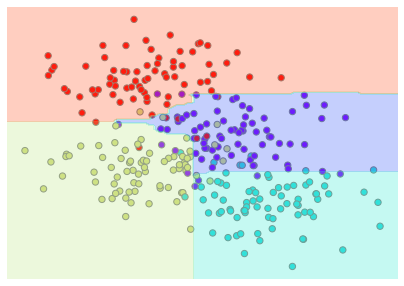

In [13]:
# initialize a bagging classifier using clf as the base decision tree
bag = BaggingClassifier(clf, n_estimators=300,
                        max_samples=0.5, random_state=1)

# fit the bagging classifier to the training data
bag.fit(X_train, y_train)

y_train_pred = bag.predict(X_train)
print("Train Accuracy (bagging):",
      metrics.accuracy_score(y_train, y_train_pred))

y_test_pred = bag.predict(X_test)
print("Test Accuracy (bagging):",
      metrics.accuracy_score(y_test, y_test_pred))

PlotDB(bag, X, y);

### Random Forest
- Random Forest is an extension of bagging that specifically applies to decision trees.
- In addition to training on bootstrap samples, Random Forest introduces randomness in the feature selection process.
- At each node of the decision tree, only a random subset of features is considered for splitting, rather than considering all features.
- By introducing this randomness, Random Forest further reduces correlation between individual trees and decorrelates their predictions, leading to better overall performance.
- As with bagging, random forests will not overfit if we increase number of trees, so in practice we use a value of sufficiently large number of trees.
- Random Forest is robust, scalable, and less prone to overfitting compared to a single decision tree.

Train Accuracy (random forest): 0.9380952380952381
Test Accuracy (random forest): 0.8666666666666667


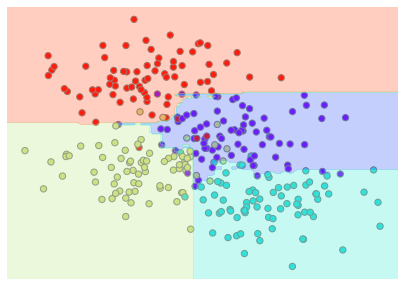

In [14]:
# create a Random Forest classifier
RF = RandomForestClassifier(n_estimators=300, min_samples_split=5,
                            min_samples_leaf=2, random_state=1)

# fit the Random Forest classifier to the training data
RF.fit(X_train, y_train)

y_train_pred = RF.predict(X_train)
print("Train Accuracy (random forest):",
      metrics.accuracy_score(y_train, y_train_pred))

y_test_pred = RF.predict(X_test)
print("Test Accuracy (random forest):",
      metrics.accuracy_score(y_test, y_test_pred))

PlotDB(RF, X, y);

###  Adaboost (Adaptive Boosting)

- Adaboost is an iterative ensemble method that combines the predictions of multiple weak learners (e.g., shallow decision trees) to create a strong learner.
- It sequentially trains a series of weak learners, with each subsequent learner focusing more on the instances that were misclassified by the previous ones.
- In each iteration, Adaboost assigns higher weights to misclassified instances, forcing the subsequent weak learners to pay more attention to those instances.
- The final prediction is a weighted sum of the predictions of all weak learners, with the weights determined by their individual performance.
- Boosting does not involve bootstrap sampling; instead each tree is fit on a modified version of the original data set.
- Adaboost is particularly effective in improving the performance of weak learners and tends to focus more on difficult-to-classify instances.

Train Accuracy (adaboost): 0.8047619047619048
Test Accuracy (adaboost): 0.7777777777777778


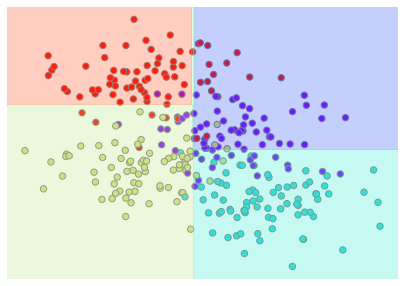

In [15]:
# create an AdaBoost classifier
ADB = AdaBoostClassifier(n_estimators=500, learning_rate=.001,
                         random_state=0)
# try different values for n_estimators (300 - 2000)
# Very small learning rate can require using a very large number of trees

# fit the AdaBoost classifier to the training data
ADB.fit(X_train, y_train)

y_train_pred = ADB.predict(X_train)
print("Train Accuracy (adaboost):",
      metrics.accuracy_score(y_train, y_train_pred))

y_test_pred = ADB.predict(X_test)
print("Test Accuracy (adaboost):",
      metrics.accuracy_score(y_test, y_test_pred))

PlotDB(ADB, X, y);

Suggestions for improvement:

- Experiment with different values of `learning_rate`. A smaller learning rate may require more estimators to achieve good performance, but too small a learning rate can significantly slow down learning.
- Consider increasing the learning rate and reducing the number of estimators or vice versa to balance computational resources and performance.
- Monitor the training and test accuracy scores to ensure that the model is not underfitting or overfitting.
- Use cross-validation to tune hyperparameters and evaluate model performance more robustly.

Adjusting the learning rate and the number of estimators may help achieve better performance and avoid excessive computational overhead. The following code you provided performs cross-validation to find the optimal learning rate for an AdaBoost classifier.

In [16]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [17]:
# create a stratified 5-fold cross-validation object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# define a parameter grid for grid search
param_grid = {'learning_rate': [.0001, .0005, .001, .01, .1]}

# create a grid search cross-validation object
grid = GridSearchCV(AdaBoostClassifier(n_estimators=500),
                    param_grid=param_grid, cv=cv)

# fit the grid search object to the training data
grid.fit(X_train, y_train)

print(grid.best_params_)

{'learning_rate': 0.0005}


### Gradient Boosting

- Gradient Boosting is another iterative ensemble method that builds a series of weak learners sequentially.
- Unlike Adaboost, which updates the instance weights, Gradient Boosting focuses on optimizing the residual errors made by the previous weak learners.
- Each weak learner is trained to predict the residuals (the differences between the actual and predicted values) of the ensemble's current prediction.
- The subsequent weak learners are trained to correct the errors of the ensemble's current prediction by fitting to the residuals.
- The final prediction is the sum of all weak learner predictions, where each weak learner's contribution is determined by a learning rate parameter.
- Gradient Boosting tends to be more robust and less sensitive to noisy data compared to Adaboost.

Train Accuracy (GBoosting): 0.8857142857142857
Test Accuracy (GBoosting): 0.8111111111111111


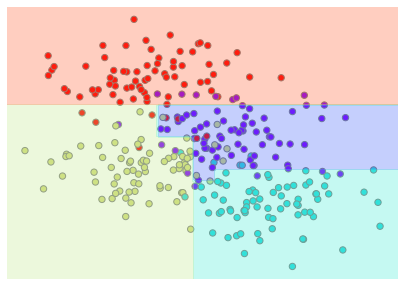

In [18]:
# create a gradient boosing classifier
GB = GradientBoostingClassifier(n_estimators=300, learning_rate=.01,
                                max_depth=1, random_state=0)

# fit the gradient boosing classifier to the training data
GB.fit(X_train, y_train)

y_train_pred = GB.predict(X_train)
print("Train Accuracy (GBoosting):",
      metrics.accuracy_score(y_train, y_train_pred))

y_test_pred = GB.predict(X_test)
print("Test Accuracy (GBoosting):",
      metrics.accuracy_score(y_test, y_test_pred))

PlotDB(GB, X, y);

### XGBoost

XGBoost, short for eXtreme Gradient Boosting, is a popular and powerful machine learning library used for supervised learning tasks, particularly for regression and classification problems. It is based on the gradient boosting framework and is known for its speed, efficiency, and performance in a wide range of machine learning tasks.

Here are some key features and components of XGBoost:

1. **Gradient Boosting**: XGBoost is based on the gradient boosting framework, which builds an ensemble of weak learners (typically decision trees) sequentially, where each new learner is trained to correct the errors made by the ensemble so far. This iterative process minimizes a predefined loss function, leading to a strong learner that combines the predictions of multiple weak learners.

2. **Regularization**: XGBoost incorporates various regularization techniques to prevent overfitting and improve generalization performance. It includes L1 (Lasso) and L2 (Ridge) regularization terms in the objective function to penalize complex models. Additionally, it supports a range of hyperparameters that control the complexity of the learned model, such as `max_depth` (maximum depth of trees), `min_child_weight` (minimum sum of instance weight needed in a child), and `gamma` (minimum loss reduction required to make a further partition on a leaf node).

3. **Optimized Implementation**: XGBoost is designed for efficiency and scalability. It is implemented in C++ and provides interfaces for various programming languages, including Python, R, Java, and Scala. Its algorithmic optimizations, such as approximate tree learning and parallel computing, make it suitable for large-scale datasets and high-dimensional feature spaces.

4. **Tree Pruning**: XGBoost employs tree pruning techniques to control the complexity of individual trees and reduce overfitting. It aggressively prunes trees during the building process by removing nodes that do not contribute significantly to the improvement of the objective function.

5. **Support for Diverse Loss Functions**: XGBoost supports a wide range of loss functions for different types of tasks, including regression and classification. In addition to common loss functions like squared loss (for regression) and logistic loss (for binary classification), it offers flexibility to define custom loss functions tailored to specific use cases.

Overall, XGBoost is a versatile and robust tool for building accurate predictive models, especially in scenarios where performance, interpretability, and scalability are crucial considerations. Its popularity stems from its ability to achieve state-of-the-art results across various machine learning competitions and real-world applications.

#### Install the package
To install XGBoost for use in Python, you can use pip, the Python package manager. Simply run the following command in your terminal or command prompt:

```python
pip install xgboost
```

This command will download and install the latest version of XGBoost from the Python Package Index (PyPI) and make it available for use in your Python environment. Once installed, you can import and use XGBoost in your Python scripts and notebooks.

Once installed, you can import and use XGBoost in your Python scripts and notebooks.

```python
from xgboost import XGBClassifier # import XGB classifier
from xgboost import XGBRegressor  # import XGB regressor
```

In [19]:
from xgboost import XGBClassifier

Train Accuracy (GBoosting): 0.8857142857142857
Test Accuracy (GBoosting): 0.8111111111111111


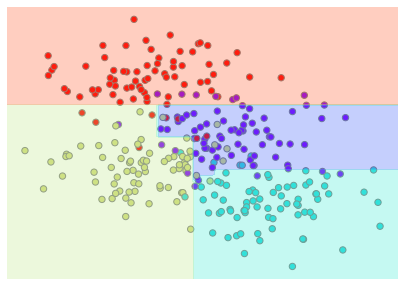

In [20]:
# create an XGBoost classifier
XGB = XGBClassifier(n_estimators=300, learning_rate=.01,
                    max_depth=1, random_state=0)

# fit the XGBoost classifier to the training data
XGB.fit(X_train, y_train)

y_train_pred = XGB.predict(X_train)
print("Train Accuracy (GBoosting):",
      metrics.accuracy_score(y_train, y_train_pred))

y_test_pred = XGB.predict(X_test)
print("Test Accuracy (GBoosting):",
      metrics.accuracy_score(y_test, y_test_pred))

PlotDB(XGB, X, y);

# Random Forest for Classifying Digits

In this example, we use the scikit-learn library to build and evaluate a classifier that can automatically classify handwritten digits into their corresponding numerical values (0 to 9). We leverage a dataset known as the digits dataset, which contains 8x8 pixel images of handwritten digits along with their true labels. Handwritten digit recognition is a fundamental problem in pattern recognition and machine learning, with applications ranging from postal mail sorting to optical character recognition (OCR).
We employ a Random Forest classifier, a popular ensemble learning algorithm, to learn patterns from the pixel intensities of the handwritten digits.

In [21]:
from sklearn.datasets import load_digits
digits = load_digits()

# view the keys (attributes) of the dataset
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Let's creates a figure and plots the digits from the digits dataset.

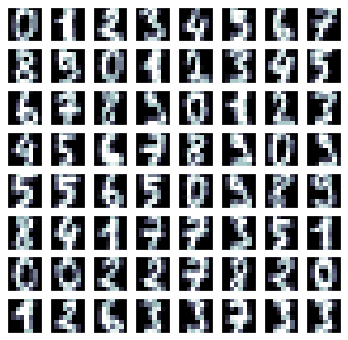

In [22]:
# set up the figure
fig = plt.figure(figsize=(6, 6))

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap='bone') # cmap=plt.cm.binary

In [23]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target,
                                                    random_state=0)

In [24]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Test Accuracy:",
      metrics.accuracy_score(y_test, y_pred))

Test Accuracy: 0.9777777777777777


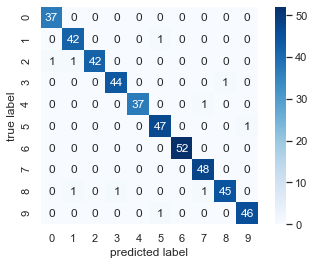

In [25]:
# calculate the confusion matrix
mat = metrics.confusion_matrix(y_test, y_pred)

# visualize the confusion matrix as a heatmap
sns.heatmap(mat, square=True, annot=True, cbar=True, cmap='Blues')

plt.ylabel('true label')
plt.xlabel('predicted label');